# Stock Market Price Prediction

The goal of this project is to use ARIMA, Auto Regressive Integrated Moving Average) model to do time series prediction for stock price using the historic data as input.

In [44]:
# Import necessary packages
import numpy as np
import pandas as pd
import os
from subprocess import check_output

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Dataset:
- https://finance.yahoo.com/quote/AAPL/history?period1=1465084800&period2=1622851200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

I have pulled the Apple stock price by day for last 5 years in the form of CSV and used it for the project.

Load data and create Pandas dataframe

In [45]:
# Load data
df = pd.read_csv("Data/AAPL.csv")

# Display key properties of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,60.435127,61.092391,59.783243,60.463278,59.284402,1.271275e+08
std,32.300756,32.730066,31.768347,32.252198,32.715542,5.739765e+07
min,23.225000,23.262501,22.875000,23.010000,21.495594,4.544800e+07
25%,38.748750,39.048749,38.430000,38.827501,37.188006,8.878360e+07
50%,47.625000,47.990002,47.325001,47.674999,46.223854,1.111176e+08
75%,72.634998,74.818748,71.827500,73.260002,72.547794,1.462944e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,4.479400e+08


In [46]:
print(f'Sample data from the dataset: \n{df.head()}')
print(f'\nShape of the dataset: {df.shape}')
print(f'\nColumns or features in the dataset: {df.columns}')

Sample data from the dataset: 
         Date       Open       High        Low      Close  Adj Close     Volume
0  2016-06-06  24.497499  25.472500  24.387501  24.657499  23.034662   93170000
1  2016-06-07  24.812500  24.967501  24.740000  24.757500  23.128084   89638000
2  2016-06-08  24.754999  24.889999  24.670000  24.735001  23.107069   83392400
3  2016-06-09  24.625000  24.997499  24.615000  24.912500  23.272882  106405600
4  2016-06-10  24.632500  24.837500  24.620001  24.707500  23.081377  126851600

Shape of the dataset: (1259, 7)

Columns or features in the dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Plot the close price from the dataset to see the trend of Apple stock price.

Text(0.5, 1.0, 'Trend for Apple share price')

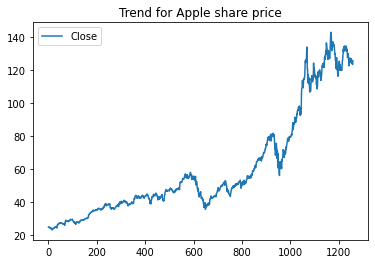

In [47]:
df[['Close']].plot()
plt.title('Trend for Apple share price')

Plot the cumulative returns for Apple stock over time.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


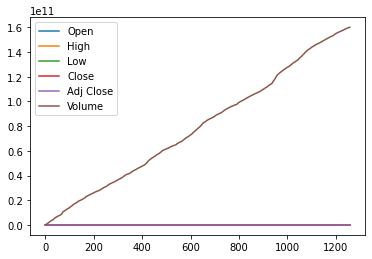

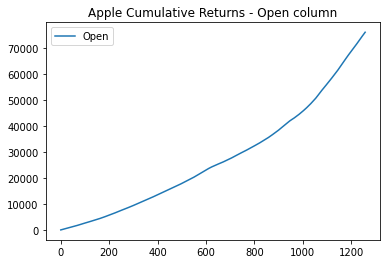

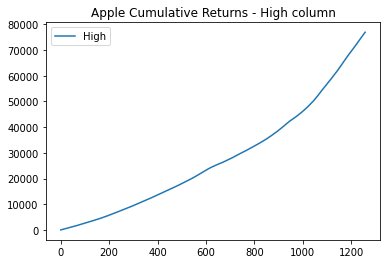

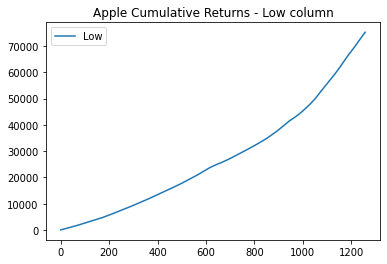

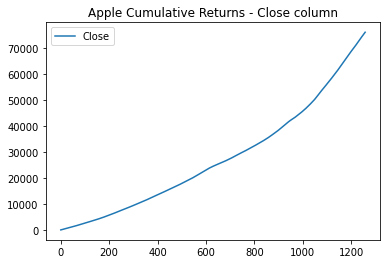

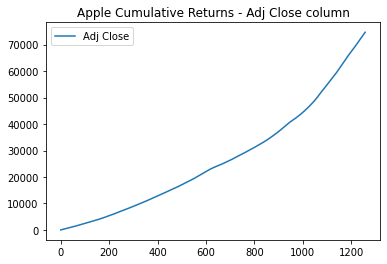

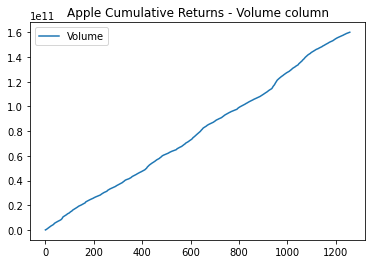

In [48]:
# Cumulative Returns
dr = df.cumsum()
print(dr.columns)
dr.plot()
for column in df.select_dtypes(include=['int64','float64']).columns:    
    dr[[column]].plot()
    plt.title(f'Apple Cumulative Returns - {column} column')

Plot the autocorrelation plot for Apple stock

Text(0.5, 1.0, 'Apple Autocorrelation plot')

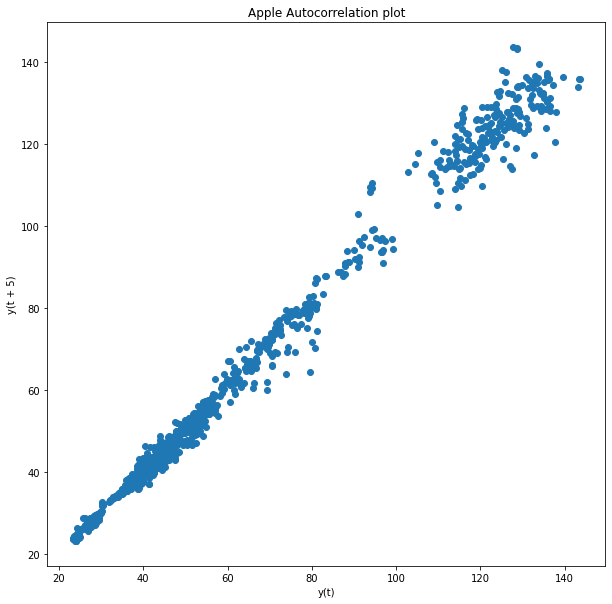

In [49]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Apple Autocorrelation plot')

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

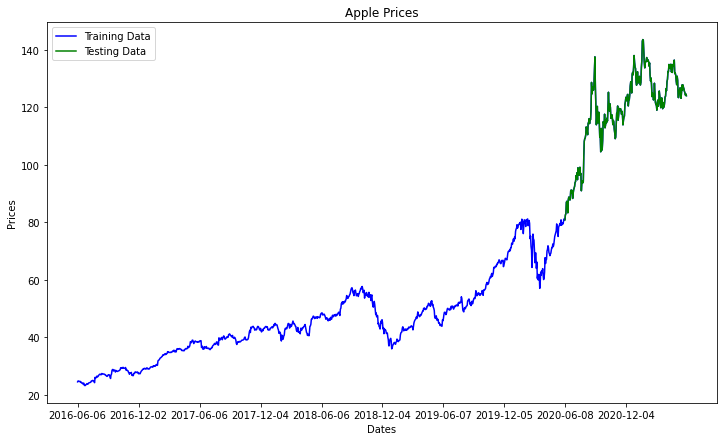

In [50]:
# Select the training and testing data
# 80% training data and 20% testing data

train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
# Select 10 dates --> 1259/10 -> 126
plt.xticks(np.arange(0,1259, 126), df['Date'][0:1259:126])
plt.legend()

In [51]:
# Calculate symmetric mean absolute percentage error
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [52]:
# Suppress Future Warnings coming from ARIMA model.
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
#                        FutureWarning)
#warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
#                        FutureWarning)

In [53]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 7.886
Symmetric mean absolute percentage error: 13.458


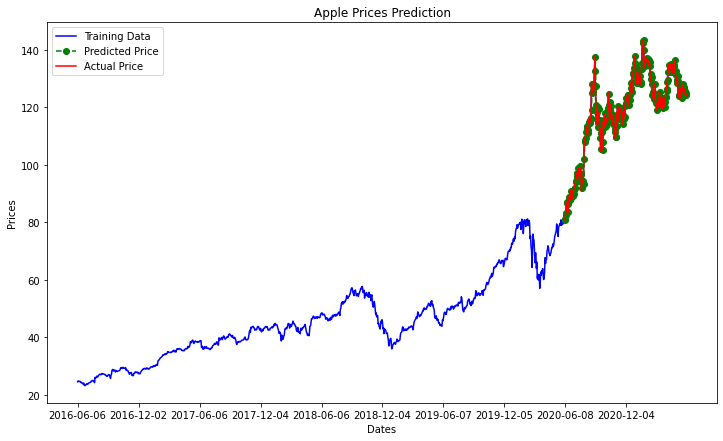

In [54]:
# Plot the predicted values
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1259, 126), df['Date'][0:1259:126])
plt.legend()

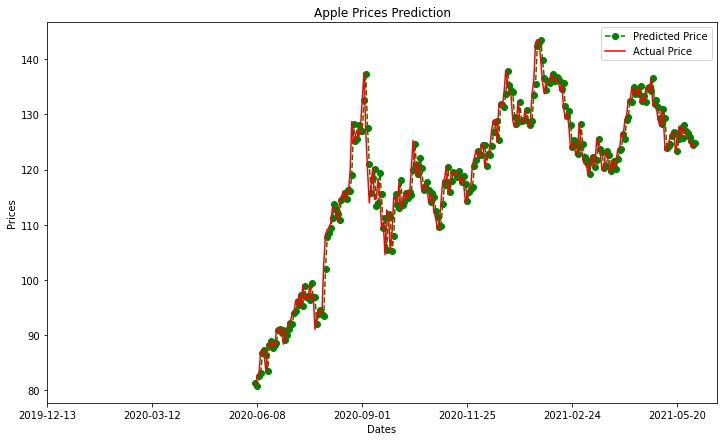

In [55]:
# Plot the predicted data only
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(888,1258, 60), df['Date'][888:1258:60])
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

Conclusion
- ARIMA model seem to perform really well in predicting the future stock price values.
- Both the Mean Squared Error and Symmetric mean absolute percentage error values are low indicating that the model has performed good.